# PS02: Data exploration, Descriptive Statistics

## Name: Kaylee Cho
### Date: April 8, 2023

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

### Cleaning Data (20pts)

1)

In [5]:
gapminder_file = "gapminder.csv"
gapminder = pd.read_csv(gapminder_file, sep = "\t")
gapminder

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13050,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2015.0,13814629.0,3.896,59.534,...,33.70000,162000.0,NaN,799405.0,22.90,12317.453,NaN,0.89162,0.0,NaN
13051,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2016.0,14030390.0,3.804,60.294,...,39.67623,162000.0,NaN,675062.0,32.50,10982.665,NaN,0.78278,0.0,NaN
13052,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2017.0,14236745.0,3.707,60.812,...,40.14428,162000.0,NaN,895073.0,38.35,NaN,NaN,NaN,0.0,NaN
13053,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2018.0,14439018.0,3.615,61.195,...,40.61636,162000.0,NaN,950627.0,38.35,NaN,NaN,NaN,NaN,NaN


2)

In [6]:
col_row = gapminder.shape
print(col_row)

(13055, 25)


3)

In [7]:
gapminder.isna().sum()

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

iso3, and the variables with less than 1000 missing values which are name, iso2, region, subregion, and so on are good columns. However, the one with more than 10,000 missing values which are youthFemaleLiteracy, youthMaleLiteracy, adultLiteracy, pm2.5_35, and battleDeaths are the ones that are nearly useless.

4)

In [8]:
gapminder[gapminder['time'].isnull()]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
180,AIA,Anguilla,AI,Americas,Latin America and the Caribbean,Caribbean,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,ALA,Åland Islands,AX,Europe,Northern Europe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,ATA,Antarctica,AQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,ATF,French Southern Territories,TF,Africa,Sub-Saharan Africa,Eastern Africa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,BES,"Bonaire, Sint Eustatius and Saba",BQ,Americas,Latin America and the Caribbean,Caribbean,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,BLM,Saint Barthélemy,BL,Americas,Latin America and the Caribbean,Caribbean,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806,BVT,Bouvet Island,BV,Americas,Latin America and the Caribbean,South America,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,CCK,Cocos (Keeling) Islands,CC,Oceania,Australia and New Zealand,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,COK,Cook Islands,CK,Oceania,Polynesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2769,CUW,Curaçao,CW,Americas,Latin America and the Caribbean,Caribbean,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5) As you can see from the result above, all the values that has time as NaN value has other column values as NaN too. For instance, the ones with NaN time has everything NaN for the columns that come out after time. 

6)

In [9]:
gapminder[gapminder['name'].isna() & gapminder['iso2'].notnull()]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths


In [10]:
gapminder[gapminder['iso2'].isna() & gapminder['name'].notnull()]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
8363,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1960.0,634142.0,6.149,46.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8364,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1961.0,649279.0,6.167,47.231,...,NaN,386420.0,NaN,35592.0,NaN,NaN,NaN,NaN,NaN,NaN
8365,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1962.0,665115.0,6.184,47.957,...,NaN,386420.0,NaN,37068.0,NaN,NaN,NaN,NaN,NaN,NaN
8366,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1963.0,681637.0,6.199,48.656,...,NaN,386420.0,NaN,37208.0,NaN,NaN,NaN,NaN,NaN,NaN
8367,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1964.0,698796.0,6.216,49.325,...,NaN,386460.0,NaN,39600.0,NaN,NaN,NaN,NaN,NaN,NaN
8368,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1965.0,716584.0,6.236,49.958,...,NaN,386460.0,NaN,43900.0,NaN,NaN,NaN,NaN,NaN,NaN
8369,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1966.0,734867.0,6.265,50.554,...,NaN,386460.0,NaN,46000.0,NaN,NaN,NaN,NaN,NaN,NaN
8370,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1967.0,753688.0,6.305,51.116,...,NaN,386490.0,NaN,48200.0,NaN,NaN,NaN,NaN,NaN,NaN
8371,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1968.0,773422.0,6.354,51.650,...,NaN,386490.0,NaN,51400.0,NaN,NaN,NaN,NaN,NaN,NaN
8372,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1969.0,794588.0,6.411,52.163,...,NaN,386490.0,NaN,52700.0,NaN,NaN,NaN,NaN,NaN,NaN


7)

Two letter country code for Namibia is NA. I'm not too sure about the reason why Namibia is missing iso2 value, but I think it might be beacuse ISO3 which is NAM is more commonly used for Namibia.

8)

In [11]:
len(gapminder.name.unique())

250

In [12]:
gapminder.time.min(), gapminder.time.max()

(1960.0, 2019.0)

### Wealth (20pts)

1)

In [13]:
gapminder[gapminder['GDP_PC'].notnull()].time.max()

2019.0

2)

In [14]:
gapminder[gapminder['time'] == 2019.0].GDP_PC.mean()

15055.352217243239

3) But not all countries may have the same most recent year where GDP data is present. Which 5 countries have the largest number of the most recent years missing?

In [15]:
gapminder_data = gapminder[["time", "name", "GDP_PC"]].dropna()
max_by_country = gapminder_data.groupby('name')['time'].nlargest(1, keep="all")
max_by_country.sort_values(ascending=False)

name                           
Afghanistan               119      2019.0
Korea, Republic of        6319     2019.0
Myanmar                   7879     2019.0
Namibia                   8422     2019.0
Nauru                     8964     2019.0
                                    ...  
Eritrea                   3482     2011.0
Turks and Caicos Islands  11360    2010.0
Liechtenstein             6790     2010.0
Djibouti                  3061     2010.0
Faroe Islands             3903     2010.0
Name: time, Length: 204, dtype: float64

4) Compute the avg wealth for each continenet in 2019, and we use region as continent. Print the continents, and the corresponding average GDP per capita. 

In [16]:
gdp_region = gapminder[gapminder['time'] == 2019.0].groupby('region').GDP_PC
gdp_region.mean().sort_values(ascending=False)

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

I think the order above is reasonavle since it's easy to recognize the values!

### Descriptive Stats (30pts)

1) Compute minimum, maximum, median and mean wealth both in 1960 and 2019.

In [17]:
gdp_1960 = gapminder[gapminder['time'] == 1960.0].GDP_PC
min_1960 = gdp_1960.dropna().min()
max_1960 = gdp_1960.dropna().max()
median_1960 = gdp_1960.dropna().median()
mean_1960 = gdp_1960.dropna().mean()
print("min:", min_1960, "max:", max_1960, "median:", median_1960, "mean:", mean_1960)

min: 153.34393 max: 33362.70762 median: 1751.86291 mean: 5050.295039780219


In [18]:
gdp_2019 = gapminder[gapminder['time'] == 2019.0].GDP_PC
min_2019 = gdp_2019.dropna().min()
max_2019 = gdp_2019.dropna().max()
median_2019 = gdp_2019.dropna().median()
mean_2019 = gdp_2019.dropna().mean()
print("min:", min_2019, "max:", max_2019, "median:", median_2019, "mean:", mean_2019)

min: 208.07473 max: 111043.5317 median: 5922.52759 mean: 15055.352217243239


2) What do these figures suggest? Has the world become richer? Has it become more equal/inequal? Anything else you notice here?

The world definitely became more richer since the mean value trippled, but the higher median value indicates that the world became more inequal.

3) Plot histograms of world wealth for 1960 and 2019.

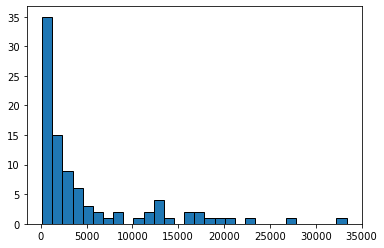

In [19]:
gdp_1960 = gapminder[gapminder['time'] == 1960.0].GDP_PC
_ = plt.hist(gdp_1960, edgecolor="black", bins=30)

gdp_2019 = gapminder[gapminder['time'] == 2019.0].GDP_PC
_ = plt.hist(gdp_2019, edgecolor="black", bins=30)

4) Compare these histograms. Comment what do you see.

Above histogram is right skewed. Which means that the world welath is more heavly distributed in the range of 0 to 40000 and a few located at the very end part of the graph.

5) Compute the quintile share ratio of GDP per capita for 1960 and 2019. What does it tell you - has inqeuality grown over time?

In [20]:
gdp_1960 = gapminder[gapminder['time'] == 1960.0].GDP_PC
print("1960:", gdp_1960.quantile())
gdp_2019 = gapminder[gapminder['time'] == 2019.0].GDP_PC
print("2019:", gdp_2019.quantile())

1960: 1751.86291
2019: 5922.52759


A quantile ratio measures the gap between the rich and the poor. Since the value increased from 1751 to 5922, the inequality had grown here.

6) Now compute the Pareto ratio for the same two years. Will your conclusion be the same?

In [21]:
top20_gm_1960 = gdp_1960[gdp_1960 >= gdp_1960.quantile(.8)]
sum_top20 = top20_gm_1960.sum()
print(sum_top20)

318426.61393


In [22]:
sum_1960 = gdp_1960.sum()
print(sum_1960)

459576.84862


In [23]:
sum_top20/sum_1960

0.6928691357847102

7) What do you think are these data useful to tell something about how the world inequality had changed over the last 60 years?

The datas we caluculated above are definitely useful to tell something about the world's inequality since it shows that the world became much wealthy compared to 1960s, but also inequal at the same time regarding that the gap between the rich and the poor got bigger.

### 4. Health (15pts)

1) How many countries don't have CM data for year 1960? How many countries do not have this information for year 2019? So is data improving over time?

In [24]:
no_CM_1960 = (gapminder['childMortality'].isna()) & (gapminder['time'] == 1960.0)
print("no CM in 1960:", len(gapminder[no_CM_1960].groupby('name')))
no_CM_2019 = (gapminder['childMortality'].isna()) & (gapminder['time'] == 2019.0)
print("no CM in 2019:", len(gapminder[no_CM_2019].groupby('name')))

no CM in 1960: 100
no CM in 2019: 20


The data is improving overtime since they do have a lot of values in the year of 2019.

2) What is the largest and smallest CM in data? Which years/countires does this correspond to?

In [25]:
gapminder.nlargest(1, 'childMortality')

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
7703,MLI,Mali,ML,Africa,Sub-Saharan Africa,Western Africa,1963.0,5441613.0,7.011,28.782,...,NaN,317080.0,150.0,1058200.0,0.21238,176.016,NaN,0.03235,NaN,NaN


In [26]:
gapminder.nsmallest(1, 'childMortality')

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
10587,SMR,San Marino,SM,Europe,Southern Europe,NaN,2018.0,33785.0,NaN,NaN,...,100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3) For each continent, which country has the smallest and the larget CM?

In [37]:
print(gapminder.groupby('region').childMortality.nlargest(1))
print(gapminder.groupby('region').childMortality.nsmallest(1))

region         
Africa    7703     420.6
Americas  1506     287.9
Asia      12817    409.8
Europe    9626     114.5
Oceania   9386     197.4
Name: childMortality, dtype: float64
region         
Africa    6679     11.5
Americas  1986      4.9
Asia      2890      2.3
Europe    10587     1.7
Oceania   663       3.6
Name: childMortality, dtype: float64
Africa has the largest CM and Oceania has the smallest CM


In [46]:
gapminder[gapminder["childMortality"] == 420.6]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
7703,MLI,Mali,ML,Africa,Sub-Saharan Africa,Western Africa,1963.0,5441613.0,7.011,28.782,...,NaN,317080.0,150.0,1058200.0,0.21238,176.016,NaN,0.03235,NaN,NaN


In [48]:
gapminder[gapminder["childMortality"] == 1.7]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
10587,SMR,San Marino,SM,Europe,Southern Europe,NaN,2018.0,33785.0,NaN,NaN,...,100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10588,SMR,San Marino,SM,Europe,Southern Europe,NaN,2019.0,33860.0,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Graphical Analysis (15pts)

1) Make a plot of child mortality over time, where you display the following countries: a) the country with largest child mortality (in 2019), b) the country with smallest child mortality (in 2019), c) Turkey, d) two (or more) countries of your choice.

In [57]:
gapminder[gapminder['time'] == 2019.0].childMortality.nlargest(1)
gapminder[gapminder['childMortality'] == 117.2] # Nigeria
gapminder[gapminder['time'] == 2019.0].childMortality.nsmallest(1)
gapminder[gapminder['childMortality'] == 1.7] # San Marino

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
10587,SMR,San Marino,SM,Europe,Southern Europe,NaN,2018.0,33785.0,NaN,NaN,...,100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10588,SMR,San Marino,SM,Europe,Southern Europe,NaN,2019.0,33860.0,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Childmortality')

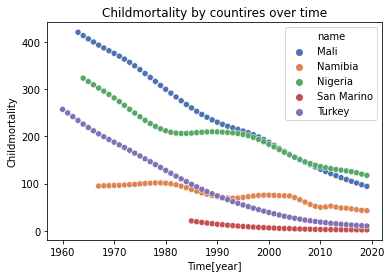

In [92]:
# plot child mortality over time containing Countries of Nigeria, San Marino, Turkey, Mali, and Namibia
gapminder = gapminder[["name", "childMortality", "time"]]
mask = gapminder[(gapminder['name'] == "Nigeria")|(gapminder['name'] == "San Marino")|
                (gapminder['name'] == "Turkey")|(gapminder['name'] == "Mali")|(gapminder['name'] == "Namibia")].dropna()
sns.scatterplot(data=mask, x="time", y="childMortality", hue="name", palette="deep")
plt.title('Childmortality by countires over time')
# Set x-axis label
plt.xlabel('Time[year]')
# Set y-axis label
plt.ylabel('Childmortality')

As you can see from the scatterplot above, the plot shows that Mali had the highest childmortality rate back in the 1960s and Niferia has the highest childmortality rate now in the 2020s. Since the graph is gradually decreasing you can tell that average health system has been developed a lot compared to 40 years ago.

#### It took about 8 hrs for me to finish this problem set!